<a href="https://colab.research.google.com/github/arwahh/Face-mask-detection-deep-learning-project-/blob/main/Face_mask_detection_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview
Goal:

Detect whether a person is wearing a face mask or not using Deep Learning (CNN).

Input: Image of a human face
Output:

*   😷 With Mask
*   ❌ Without Mask



# Technologies Used


*   Python
*   TensorFlow / Keras

*   CNN (Convolutional Neural Network)
*   OpenCV (for testing)





# Dataset Download

In [1]:
from google.colab import files
uploaded= files.upload()

Saving archive.zip to archive.zip


In [12]:
!unzip archive.zip

Archive:  archive.zip
replace data/with_mask/with_mask_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [13]:
!ls


archive.zip  data  sample_data


In [16]:
!ls data


with_mask  without_mask


In [17]:
!ls data/with_mask | head
!ls data/without_mask | head

with_mask_1000.jpg
with_mask_1001.jpg
with_mask_1002.jpg
with_mask_1003.jpg
with_mask_1004.jpg
with_mask_1005.jpg
with_mask_1006.jpg
with_mask_1007.jpg
with_mask_1008.jpg
with_mask_1009.jpg
without_mask_1000.jpg
without_mask_1001.jpg
without_mask_1002.jpg
without_mask_1003.jpg
without_mask_1004.jpg
without_mask_1005.jpg
without_mask_1006.jpg
without_mask_1007.jpg
without_mask_1008.jpg
without_mask_1009.jpg


# Import Libraries




In [11]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Load & Preprocess Images
Why preprocessing?


*   CNN needs same image size
*   Normalize pixel values (0–1)


*   Convert labels into numbers





In [12]:
data = []
labels = []

IMG_SIZE = 128

categories = ["with_mask", "without_mask"]

for category in categories:
    folder_path = os.path.join("data", category) # Changed 'dataset' to 'data'
    label = categories.index(category)

    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        image = cv2.imread(img_path)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        data.append(image)
        labels.append(label)


# Convert to NumPy Arrays

In [13]:
data = np.array(data) / 255.0
labels = np.array(labels)

labels = to_categorical(labels)


# Train-Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)


# Build CNN Model
CNN Architecture Explained:



*   Conv2D → extract features
*   MaxPooling → reduce size

*   Flatten → convert to 1D
*   Dense → classification





In [15]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu',
                 input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile Model

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



# Train the Model

In [17]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    batch_size=32
)


Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 141s 740ms/step - accuracy: 0.7784 - loss: 0.5740 - val_accuracy: 0.8769 - val_loss: 0.2867
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 147s 777ms/step - accuracy: 0.9006 - loss: 0.2429 - val_accuracy: 0.9113 - val_loss: 0.2141
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 140s 740ms/step - accuracy: 0.9218 - loss: 0.1897 - val_accuracy: 0.9080 - val_loss: 0.2727
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 142s 753ms/step - accuracy: 0.9437 - loss: 0.1423 - val_accuracy: 0.9351 - val_loss: 0.1820
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 141s 745ms/step - accuracy: 0.9574 - loss: 0.1150 - val_accuracy: 0.9312 - val_loss: 0.1893
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 137s 724ms/step - accuracy: 0.9751 - loss: 0.0728 - val_accuracy: 0.9391 - val_loss: 0.1872
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 144s 737ms/step - accuracy: 0.9762 - loss: 0.0670 - val_accuracy: 0.9378 - val_loss: 0.2152
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 144s 762ms/step - accuracy: 0.9818 -

# Accuracy & Loss Graph

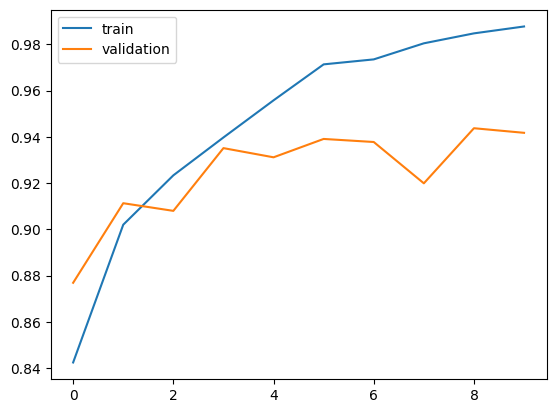

In [18]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()


# Save Model

In [19]:
model.save("face_mask_detector.h5")


# Test on New Image

In [21]:
img = cv2.imread("data/with_mask/with_mask_1.jpg") # Changed 'test.jpg' to an existing image path
img = cv2.resize(img, (128,128))
img = img / 255.0
img = np.reshape(img, (1,128,128,3))

prediction = model.predict(img)

if np.argmax(prediction) == 0:
    print("😷 With Mask")
else:
    print("❌ Without Mask")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
😷 With Mask


In [23]:
prediction = model.predict(img)

class_id = np.argmax(prediction)
confidence = np.max(prediction)

if class_id == 0:
    print("😷 With Mask")
else:
    print("❌ Without Mask")

print("Confidence:", confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
😷 With Mask
Confidence: 0.99999976
